In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm

In [3]:
white_wines = pd.read_csv("data/winequality-white.csv", sep=';')
red_wines = pd.read_csv("data/winequality-red.csv", sep=';')

In [4]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


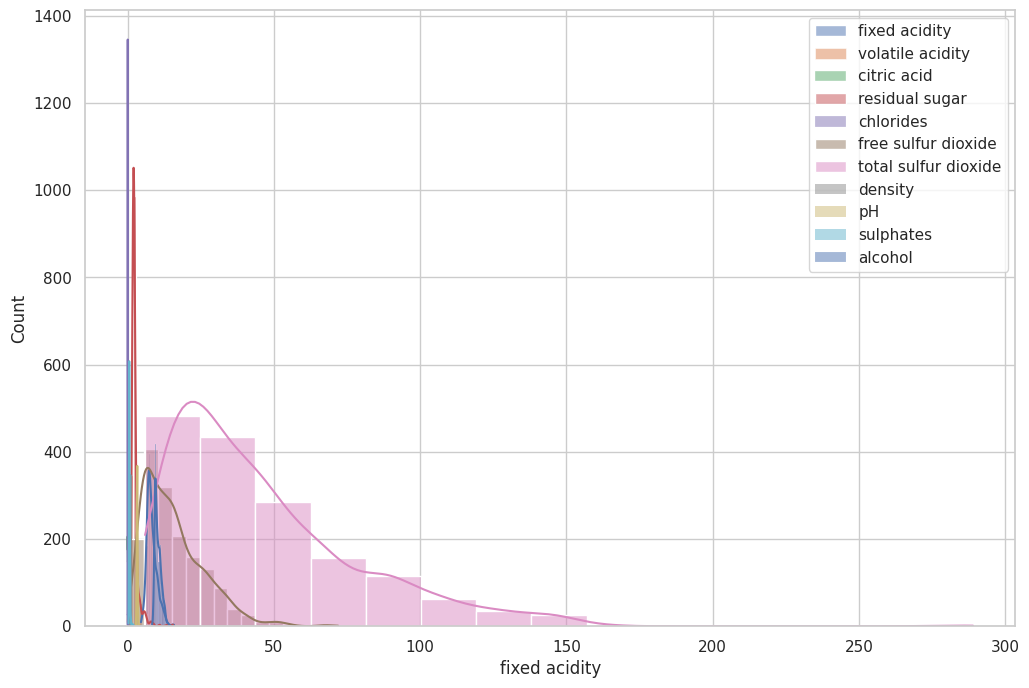

In [13]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for col in red_wines.columns[:-1]:  # Exclude the quality column
    sns.histplot(red_wines[col], kde=True, bins=15, label=col)
plt.legend()
plt.show()

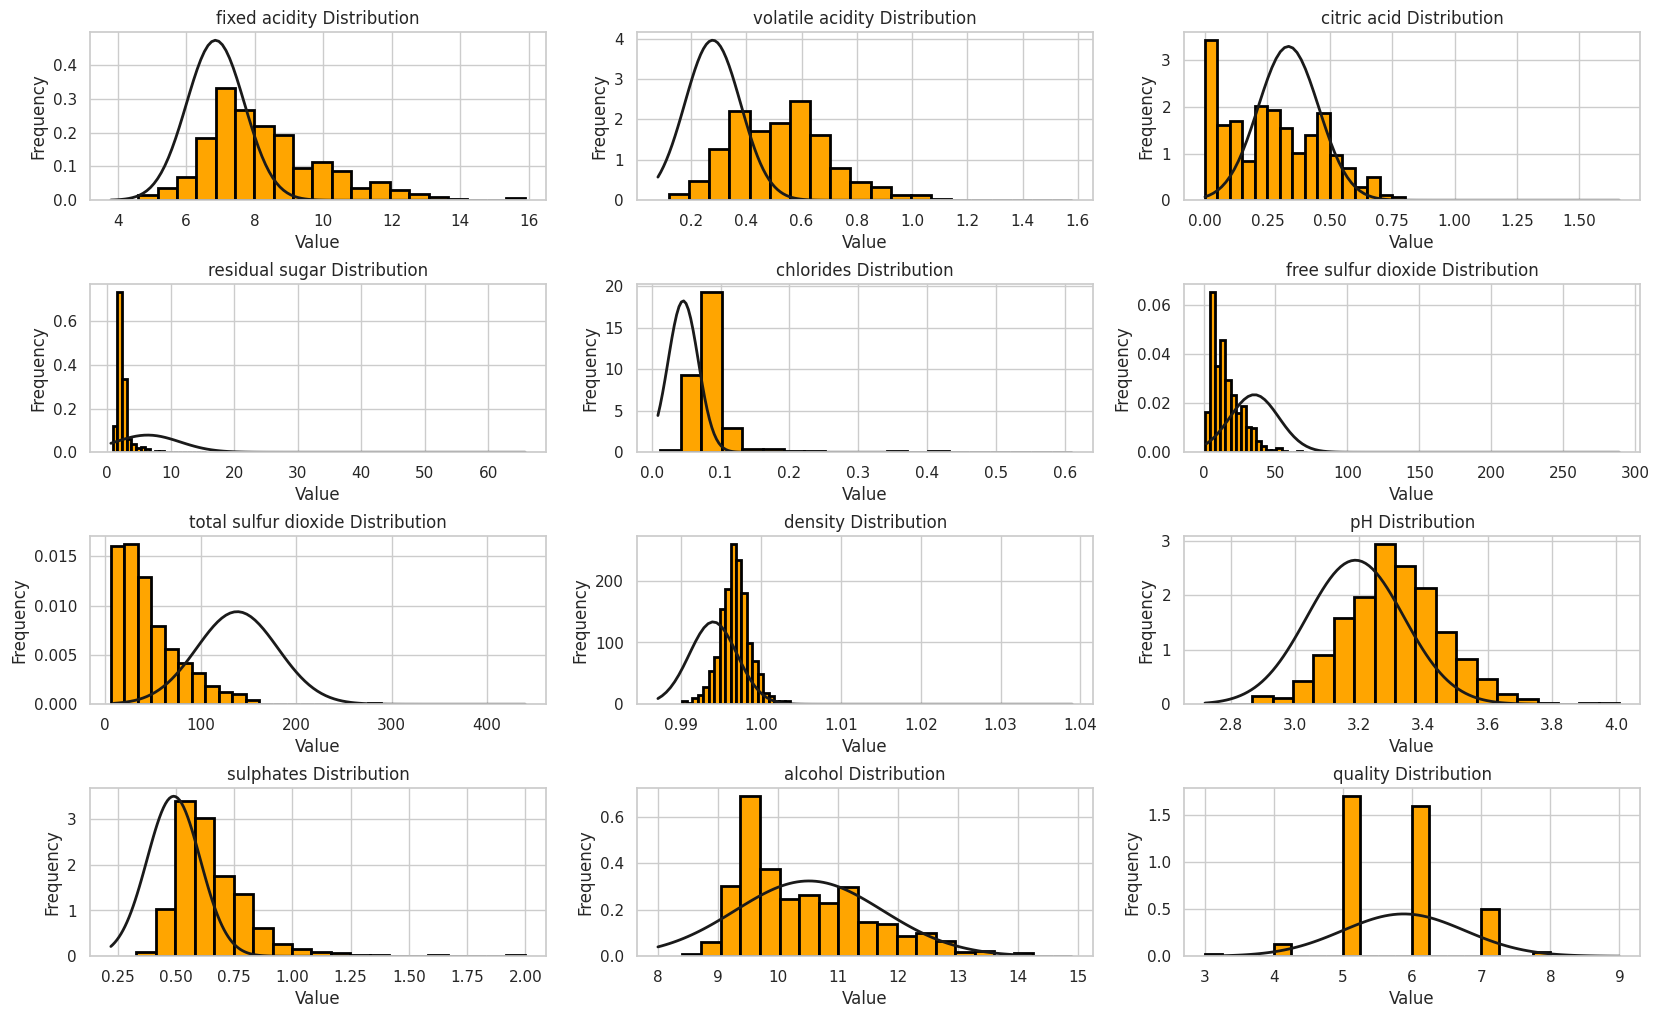

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 12))
fig.subplots_adjust(hspace=0.5)


for i, col in enumerate(white_wines.columns):
    ax = axes.flatten()[i]

    ax.hist(red_wines[col], bins=20, color='orange', edgecolor='black', density=True, lw=2)

    mu, std = white_wines[col].mean(), white_wines[col].std()
    xmin, xmax = white_wines[col].min(), white_wines[col].max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.show()

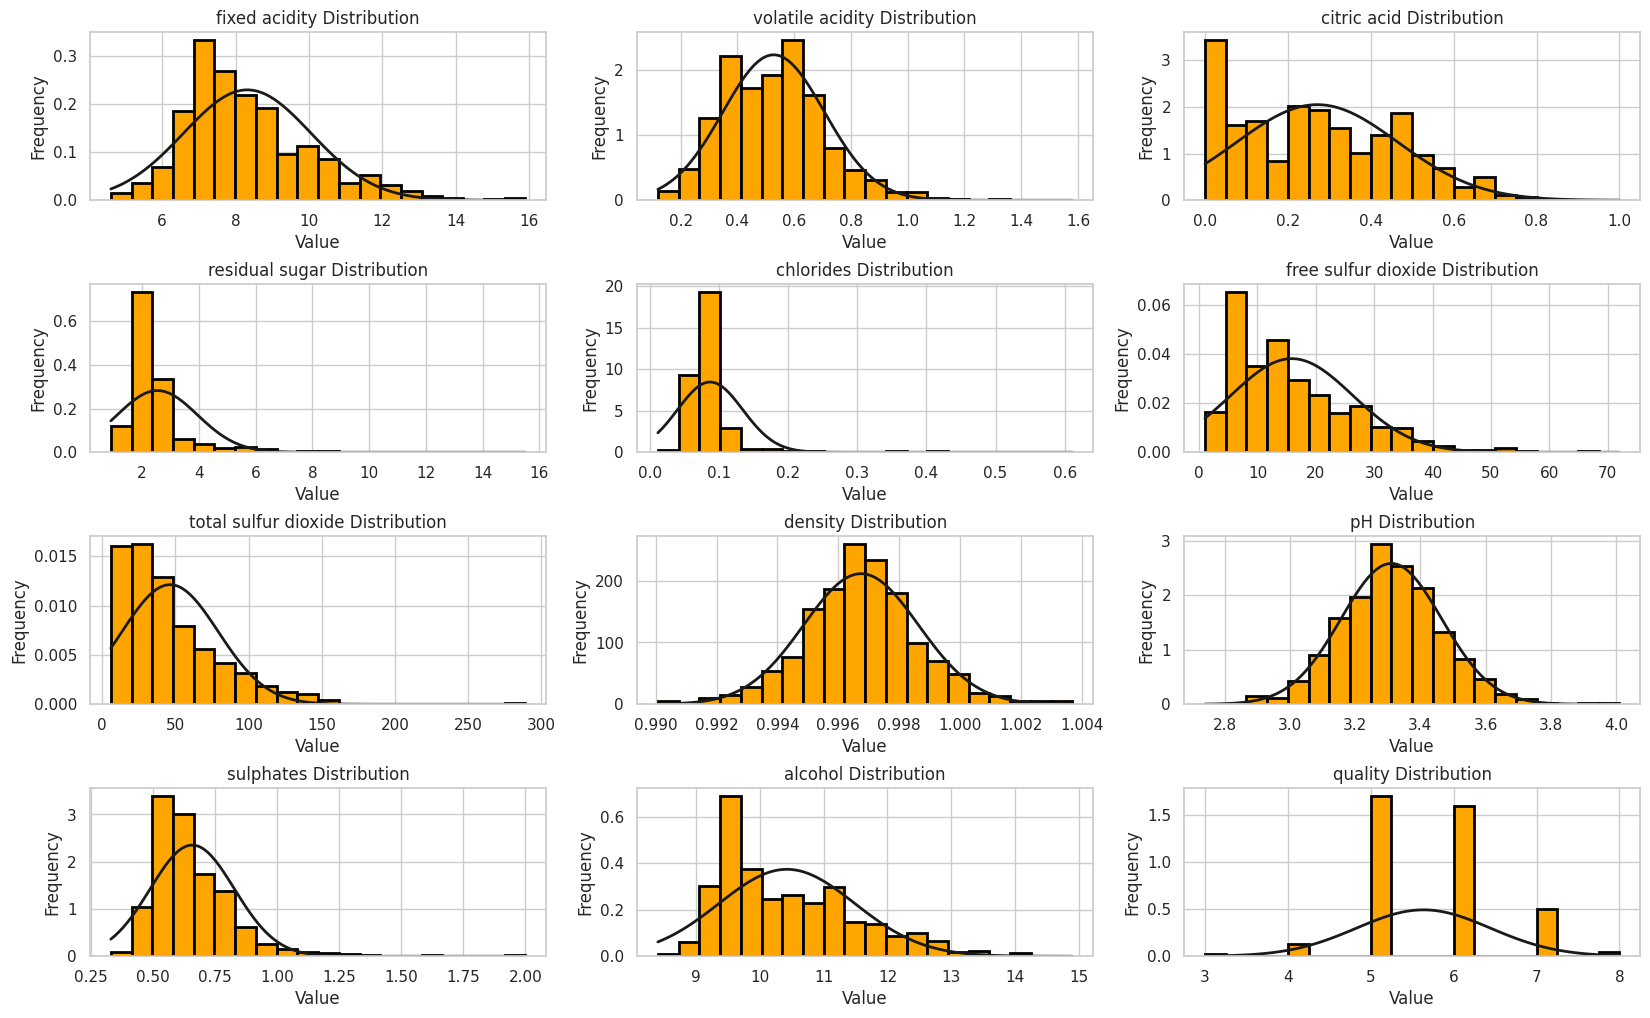

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 12))
fig.subplots_adjust(hspace=0.5)


for i, col in enumerate(red_wines.columns):
    ax = axes.flatten()[i]

    ax.hist(red_wines[col], bins=20, color='orange', edgecolor='black', density=True, lw=2)

    mu, std = red_wines[col].mean(), red_wines[col].std()
    xmin, xmax = red_wines[col].min(), red_wines[col].max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.show()

<Axes: >

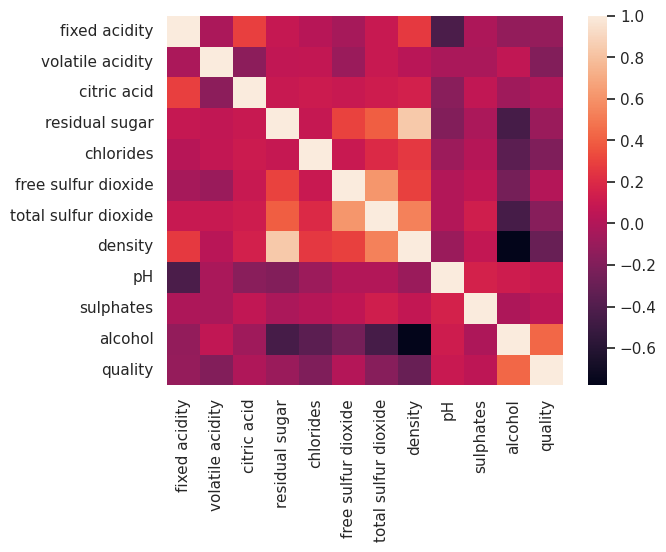

In [16]:
corr_matrix = white_wines.corr()
sns.heatmap(corr_matrix)

<Axes: >

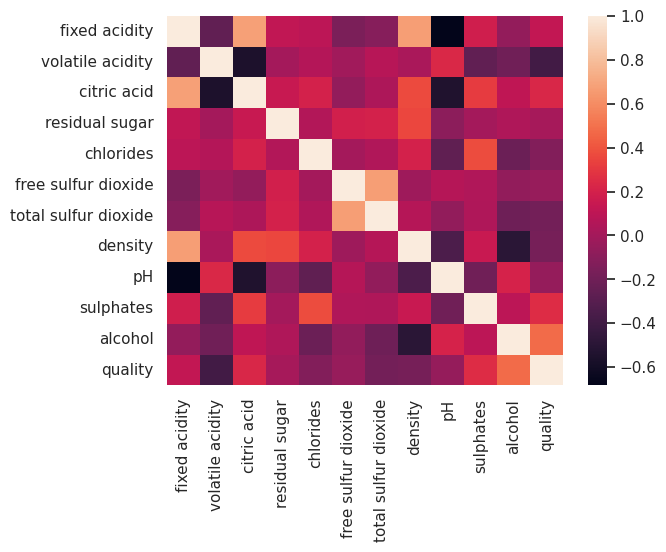

In [17]:
corr_matrix = red_wines.corr()
sns.heatmap(corr_matrix)

For both wine, most of the distribution of features are right skewed, which looks like chi-square distribution, while pH, density, and critic acid are normal distributed. Alcohol is highly and positively correlated to the quality of both wine, while most features are almost zero correlated to the quality.

In [18]:
#creating target variable and splitting data to train and test sets
white_X = white_wines.iloc[:, :-1]
red_X = red_wines.iloc[:, :-1]
white_y = white_wines['quality']
red_y = red_wines['quality']

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(white_X, white_y)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(red_X, red_y)

In [19]:
#linear regression for white wine
linear_regression = LinearRegression()
linear_regression.fit(X_train_white, y_train_white)

y_pred_white = linear_regression.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
mae_white = mean_absolute_error(y_test_white, y_pred_white)
score_white = r2_score(y_test_white, y_pred_white)

print('For white wine test set after linear regression:')
print(f'MSE: {mse_white: .3f}')
print(f'MAE: {mae_white: .3f}')
print(f'R^2: {score_white: .3f}')

For white wine test set after linear regression:
MSE:  0.549
MAE:  0.578
R^2:  0.289


In [20]:
#linear regression for red wine
linear_regression = LinearRegression()
linear_regression.fit(X_train_red, y_train_red)

y_pred_red = linear_regression.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)
score_red = r2_score(y_test_red, y_pred_red)

print('For red wine test set after linear regression:')
print(f'MSE: {mse_red: .3f}')
print(f'MAE: {mae_red: .3f}')
print(f'R^2: {score_red: .3f}')

For red wine test set after linear regression:
MSE:  0.414
MAE:  0.507
R^2:  0.384


In [21]:
#Ridge regression for white wine
parametrs = {'alpha': np.logspace(-6, 6, 20)}
ridge = GridSearchCV(Ridge(), parametrs, cv=5)
ridge.fit(X_train_white, y_train_white)

y_pred_white = ridge.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
mae_white = mean_absolute_error(y_test_white, y_pred_white)
score_white = r2_score(y_test_white, y_pred_white)

print('For white wine test set after Ridge regression:')
print(f'MSE: {mse_white: .3f}')
print(f'MAE: {mae_white: .3f}')
print(f'R^2: {score_white}')
print(f"Best parametr: {ridge.best_params_['alpha']}")

For white wine test set after Ridge regression:
MSE:  0.550
MAE:  0.578
R^2: 0.28755320492435643
Best parametr: 0.0003359818286283781


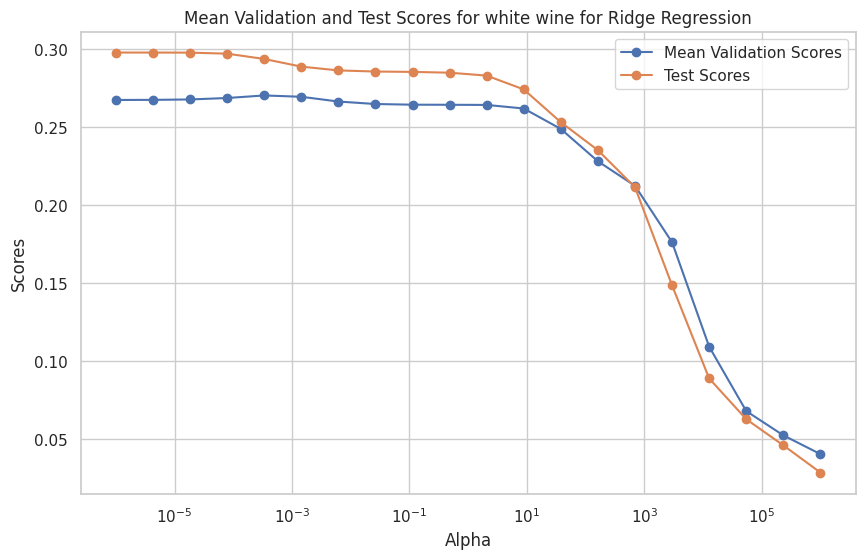

In [23]:
alphas = ridge.cv_results_['param_alpha'].data
train_scores = ridge.cv_results_['mean_test_score']
test_scores = []
for alpha in alphas:
  temp_ridge = Ridge(alpha=alpha)
  temp_ridge.fit(X_test_white, y_test_white)
  test_scores.append(r2_score(y_test_white, temp_ridge.predict(X_test_white)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Mean Validation Scores', marker='o')
plt.plot(alphas, test_scores, label='Test Scores', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Mean Validation and Test Scores for white wine for Ridge Regression')
plt.xscale('log')

plt.legend()

plt.show()

In [24]:
#Ridge regression for red wine
parametrs = {'alpha': np.logspace(-6, 6, 20)}
ridge = GridSearchCV(Ridge(), parametrs, cv=5)
ridge.fit(X_train_red, y_train_red)

y_pred_red = ridge.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)
score_red = r2_score(y_test_red, y_pred_red)

print('For red wine test set after Ridge regression:')
print(f'MSE: {mse_red: .3f}')
print(f'MAE: {mae_red: .3f}')
print(f'R^2: {score_red: .3f}')
print(f"Best parametr: {ridge.best_params_['alpha']}")

For red wine test set after Ridge regression:
MSE:  0.414
MAE:  0.507
R^2:  0.384
Best parametr: 0.4832930238571752


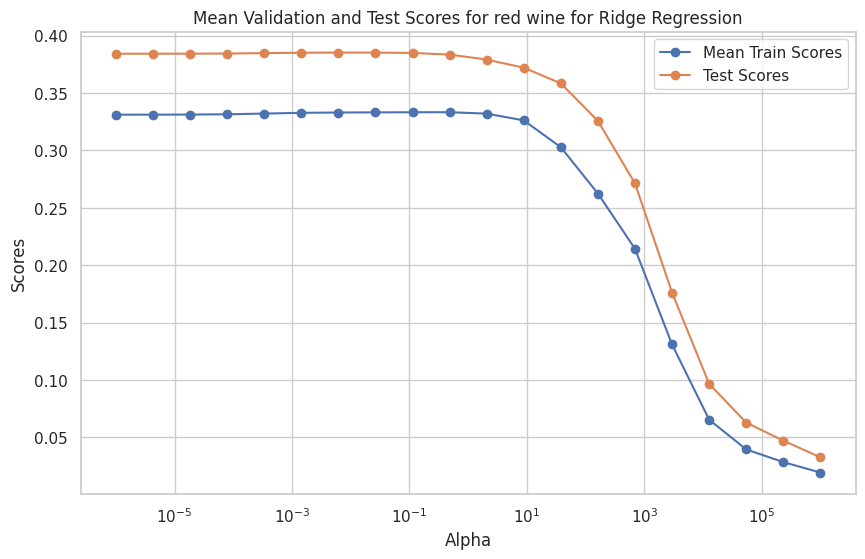

In [26]:
alphas = ridge.cv_results_['param_alpha'].data
train_scores = ridge.cv_results_['mean_test_score']
test_scores = []
for alpha in alphas:
  temp_ridge = Ridge(alpha=alpha)
  temp_ridge.fit(X_train_red, y_train_red)
  test_scores.append(r2_score(y_test_red, temp_ridge.predict(X_test_red)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Mean Train Scores', marker='o')
plt.plot(alphas, test_scores, label='Test Scores', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Mean Validation and Test Scores for red wine for Ridge Regression')
plt.xscale('log')

plt.legend()

plt.show()

In [27]:
#Lasso regression for white wine
parametrs = {'alpha': np.logspace(-6, 6, 20)}
lasso = GridSearchCV(Lasso(), parametrs, cv=5)
lasso.fit(X_train_white, y_train_white)

y_pred_white = lasso.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
mae_white = mean_absolute_error(y_test_white, y_pred_white)
score_white = r2_score(y_test_white, y_pred_white)

print('For white wine test set after Lasso regression:')
print(f'MSE: {mse_white: .3f}')
print(f'MAE: {mae_white: .3f}')
print(f'R^2: {score_white: .3f}')
print(f"Best parametr: {lasso.best_params_['alpha']}")

For white wine test set after Lasso regression:
MSE:  0.552
MAE:  0.578
R^2:  0.286
Best parametr: 1.8329807108324375e-05


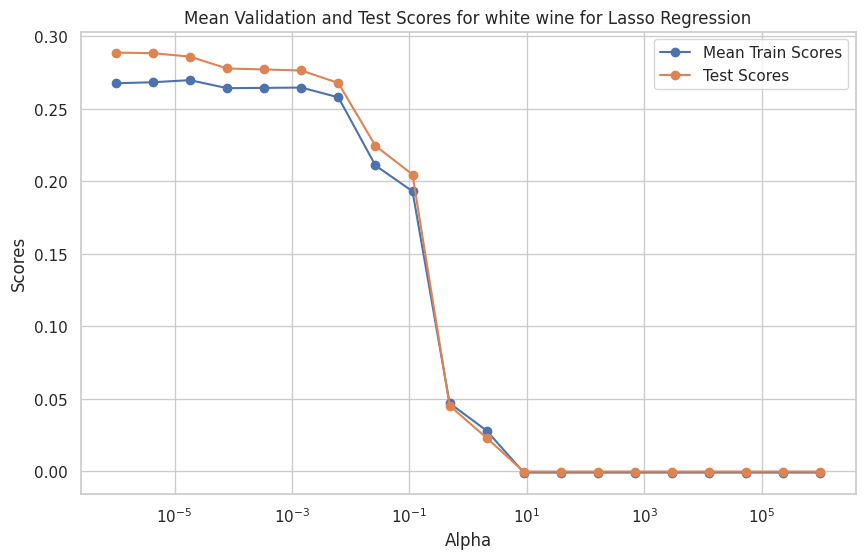

In [28]:
alphas = lasso.cv_results_['param_alpha'].data
train_scores = lasso.cv_results_['mean_test_score']
test_scores = []
for alpha in alphas:
  temp_lasso = Lasso(alpha=alpha)
  temp_lasso.fit(X_train_white, y_train_white)
  test_scores.append(r2_score(y_test_white, temp_lasso.predict(X_test_white)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Mean Train Scores', marker='o')
plt.plot(alphas, test_scores, label='Test Scores', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Mean Validation and Test Scores for white wine for Lasso Regression')
plt.xscale('log')

plt.legend()

plt.show()

In [29]:
#Lasso regression for red wine
parametrs = {'alpha': np.logspace(-6, 6, 20)}
lasso = GridSearchCV(Lasso(), parametrs, cv=5)
lasso.fit(X_train_red, y_train_red)

y_pred_red = lasso.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)
score_red = r2_score(y_test_red, y_pred_red)

print('For red wine test set after Lasso regression:')
print(f'MSE: {mse_red: .3f}')
print(f'MAE: {mae_red: .3f}')
print(f'R^2: {score_red: .3f}')
print(f"Best parametr: {lasso.best_params_['alpha']}")

For red wine test set after Lasso regression:
MSE:  0.414
MAE:  0.507
R^2:  0.384
Best parametr: 0.0003359818286283781


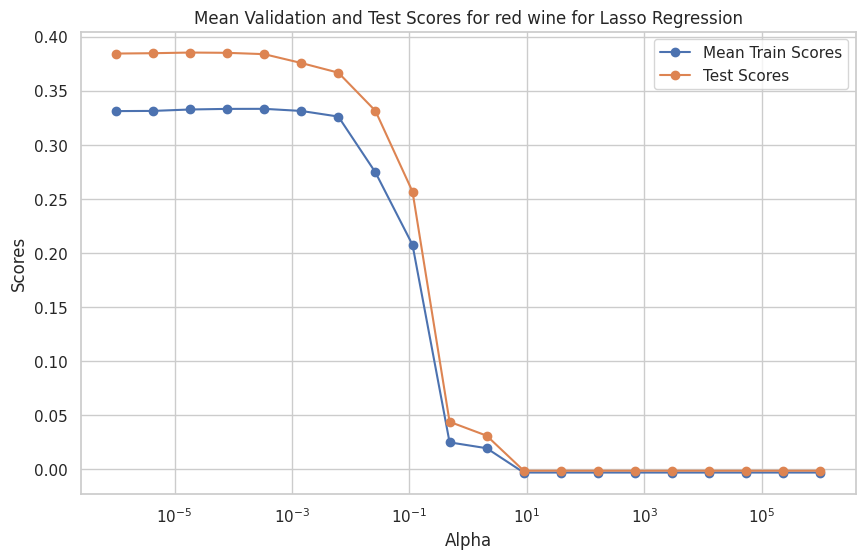

In [30]:
alphas = lasso.cv_results_['param_alpha'].data
train_scores = lasso.cv_results_['mean_test_score']
test_scores = []
for alpha in alphas:
  temp_lasso = Lasso(alpha=alpha)
  temp_lasso.fit(X_train_red, y_train_red)
  test_scores.append(r2_score(y_test_red, temp_lasso.predict(X_test_red)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Mean Train Scores', marker='o')
plt.plot(alphas, test_scores, label='Test Scores', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Mean Validation and Test Scores for red wine for Lasso Regression')
plt.xscale('log')

plt.legend()

plt.show()

In [31]:
#Elastic net regression for white wine
parametrs = {'alpha': np.logspace(-6, 6, 20), 'l1_ratio': np.linspace(0.1, 0.9, 25)}
elastic = GridSearchCV(ElasticNet(), parametrs, cv=5)
elastic.fit(X_train_white, y_train_white)

y_pred_white = elastic.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
mae_white = mean_absolute_error(y_test_white, y_pred_white)
score_white = r2_score(y_test_white, y_pred_white)

print('For white wine test set after Elastic Net regression:')
print(f'MSE: {mse_white: .3f}')
print(f'MAE: {mae_white: .3f}')
print(f'R^2: {score_white: .3f}')
print(f"Best alpha: {elastic.best_params_['alpha']}")
print(f"Best l1_ratio: {elastic.best_params_['l1_ratio']}")

For white wine test set after Elastic Net regression:
MSE:  0.551
MAE:  0.578
R^2:  0.286
Best alpha: 1e-06
Best l1_ratio: 0.8333333333333333


In [34]:
#Elastic net regression for red wine
parametrs = {'alpha': np.logspace(-6, 6, 20), 'l1_ratio': np.linspace(0.1, 0.9, 20)}
elastic = GridSearchCV(ElasticNet(), parametrs, cv=5)
elastic.fit(X_train_red, y_train_red)

y_pred_red = elastic.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)
score_red = r2_score(y_test_red, y_pred_red)

print('For red wine test set after Elastic Net regression:')
print(f'MSE: {mse_red: .3f}')
print(f'MAE: {mae_red: .3f}')
print(f'R^2: {score_red: .3f}')
print(f"Best alpha: {elastic.best_params_['alpha']}")
print(f"Best l1_ratio: {elastic.best_params_['l1_ratio']}")

For red wine test set after Elastic Net regression:
MSE:  0.414
MAE:  0.507
R^2:  0.384
Best alpha: 0.0003359818286283781
Best l1_ratio: 0.1
